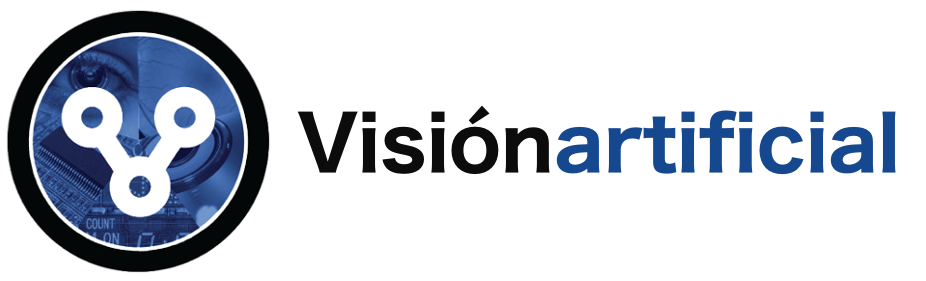
<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# OpenCV 

### para a materia de Visión Artificial do Grao de Robótica. EPSE de Lugo.
<hr style = "border: none; height: 4px; background-color: # D3D3D3" />

# <font style="color:rgb(50,120,229)">Contornos </font>

Os contornos son simplemente os límites dun obxecto ou parte dun obxecto nunha imaxe. Son útiles na análise de formas e na detección/recoñecemento de obxectos mediante algoritmos tradicionais de VA.

Pódese facer moitas análises baseadas en contornos para dar unha solución a moitos problemas de VA.

Neste caderno, discutiremos aspectos diferentes da análise de contornos. Imos aló!

In [99]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [100]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)
matplotlib.rcParams['image.cmap'] = 'gray'

## <font style="color:rgb(50,120,229)">Cargamos a imaxe e visualizamola </font>

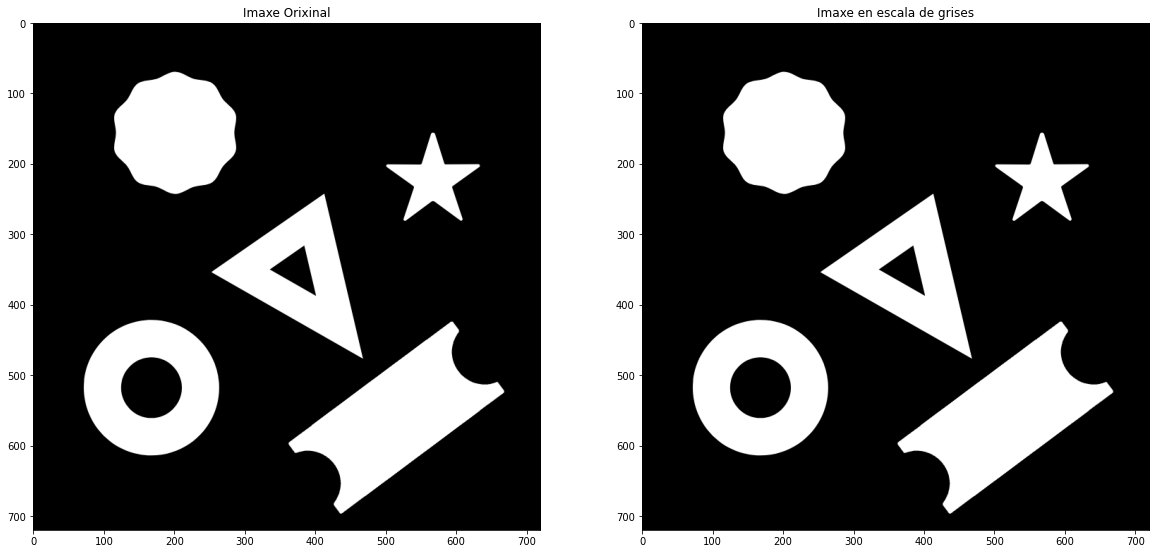

In [101]:
#Lemos a imaxe e a convertemos a gris (non emprego o flag =0 en imwrite a propósito!)
imagePath = "../data/Contour.png"
image = cv2.imread(imagePath)
if image is None:
    raise Exception("Non atopo a imaxe no sitio indicado")
imageGray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)


# Visualizamos a imaxe de entrada e o seu clon de gris
plt.figure()
plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.title("Imaxe Orixinal");
plt.subplot(122)
plt.imshow(imageGray)
plt.title("Imaxe en escala de grises");

# <font style="color:rgb(50,120,229)">Como atopamos os contornos?</font>

Vimos en clase que hai moitas formas para atopar contornos. Aqui ilustraremos como empregar a función OpenCV 
 [**`findContours`**](https://docs.opencv.org/4.1.0/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) para atopar os bordes dos obxectos visualizados nas iamxes anteriores.

### <font style="color:rgb(8,133,37)">Sintaxe da Función </font>

```python
contours, hierarchy	=	cv.findContours(image, mode, method[, contours[, hierarchy[, offset]]])
```

Onde,


- **`image`**	- imaxe de entrada (8-bit canle-única). Os píxeles distintos de 0 son tratados como 1s (imaxe binaria). Podes empregar esta función para comparar, inRange, threshold , adaptiveThreshold, Canny, e outros métodos para crear imaxe binarias a partir dunha imaxe de gris ou de cor.  
- **`contours`** - Contornas detectadas. Cada contorna almacenase como un vector de puntos.
- **`hierarchy`** - Opcional, este vector conterá acerca da topoloxía da imaxe.
- **`mode`** - Modo de recuperación de contornos (RETR_LIST, RETR_CCOMP, RETR_TREE )
- **`method`** - Método de codificación de contornos. ( CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE, CHAIN_APPROX_TC89_L1 etc )
- **`offset`** - Offset opcional polo que cada punto dun contorno é desprazado. Isto é útil se, por exemplo, extraemos as contornas dunha rexión da imaxe (ROI) e logo queremos analizados no contexto global da imaxe enteira.

### <font style="color:rgb(8,133,37)">Documentación de OpenCV</font>

[**`findContours()`**](https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0)


<hr style="border:none; height: 4px; background-color:#D3D3D3" />

In [102]:
# Atopamos todos as contornas na imaxe
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [103]:
print("Número de contornas atopadas = {}".format(len(contours)))
#Consulta a documentación de OpenCv para saber mais sobre a xerarquia devolta pola función
print("\nXerarquía : \n{}".format(hierarchy))

Número de contornas atopadas = 7

Xerarquía : 
[[[ 1 -1 -1 -1]
  [ 2  0 -1 -1]
  [ 3  1 -1 -1]
  [ 4  2 -1 -1]
  [ 5  3 -1 -1]
  [ 6  4 -1 -1]
  [-1  5 -1 -1]]]


# <font style="color:rgb(50,120,229)">Debuxando as contornas</font>
As contornas son , simplemente, un array coas localizacións do píxeles. Imos a debuxamos sobre os bordes dos obxectos.

In [104]:
# Debuxamos todos os contornos
img = image.copy()
cv2.drawContours(img, contours, -1, (0,255,0), 3);

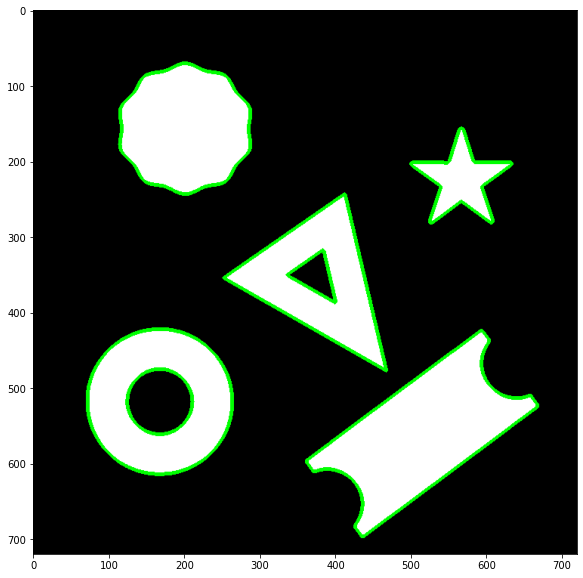

In [105]:
plt.imshow(img[:,:,::-1]);

Nota que tanto as contornas interiores como exteriores se detectaron correctamente.

Como podemos facer se só queremos detectar bordes exteriores? Podemos empregar o modo `cv2.RETR_EXTERNAL` cando chamamos a función `cv2.findContours`.

Número de contornos atopados = 5


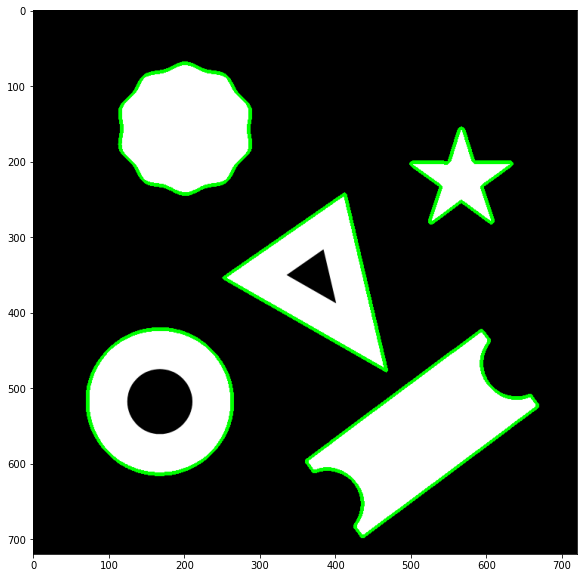

In [106]:
#Atopamos as contornas externos da imaxe
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print("Número de contornos atopados = {}".format(len(contours)))

# Debuxamos todos as contornas
img = image.copy()
cv2.drawContours(img, contours, -1, (0,255,0), 3);
plt.imshow(img[:,:,::-1]);

In [107]:
# Debuxamos soamente o terceiro contorno
# Nota que nosoutron non sabemos a que forma da imaxe se corresponde o terceiro contorno atopado
img = image.copy()
cv2.drawContours(img, contours[2], -1, (0,0,255), 3);

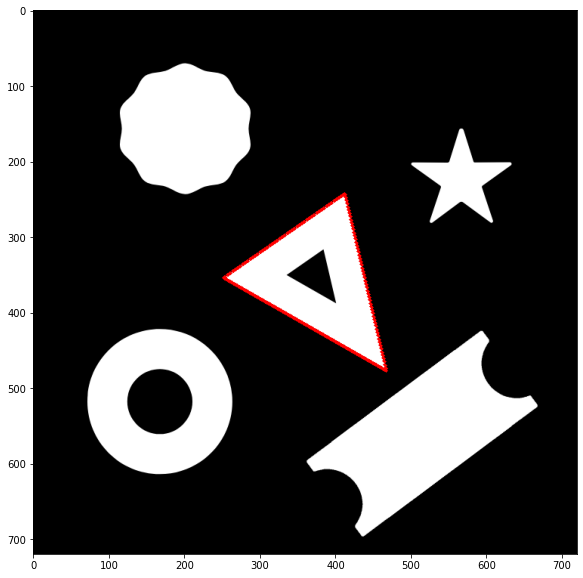

In [108]:
plt.imshow(img[:,:,::-1]);

# <font style="color:rgb(50,120,229)">Propiedades das contornas</font>
Unha vez detectados os contornos dunha imaxe, faise moi doado facer obter propiedades das formar que temos contorneadas. Imos ver algunhas propiedades útiles.


## <font style="color:rgb(50,120,229)">Centro de masas ou centroide</font>
Imos atopar o centro de masas da forma ou centroide.

In [109]:
# Atopamps todos as contornas daimaxe
contours, hierarchy = cv2.findContours(imageGray, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
# Visualizamos as contornas
img = image.copy()
cv2.drawContours(img, contours, -1, (0,255,0), 3);

In [110]:
for cnt in contours:
    #Empregaremos os momentos da contorna
    # para atopar o centroide
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Marcamos o centroide
    cv2.circle(img, (x,y), 10, (255,0,0), -1);

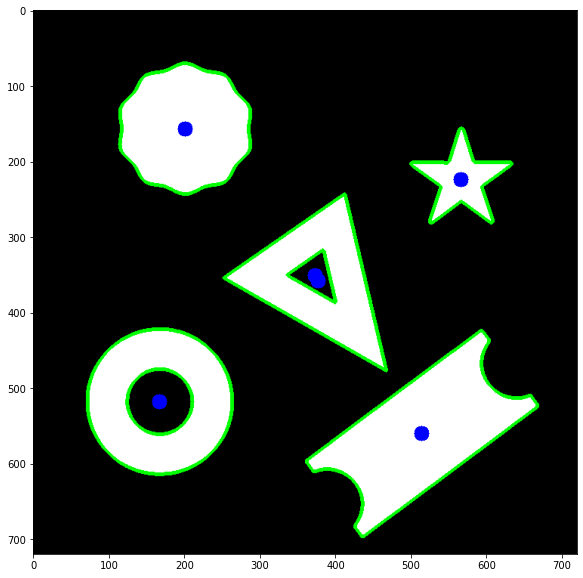

In [111]:
plt.imshow(img[:,:,::-1]);

Para o triangulo con oco no seu interior, podes ver que se marcaron varios puntos, sabes por que? Traza as contornas unha por unha e averigua que figuras están na mesma condición que a sinalada.

In [112]:
img = image.copy()
for index,cnt in enumerate(contours):
    # Imos a empregar os momentos da contorna
    # para atopar o centroide
    M = cv2.moments(cnt)
    x = int(round(M["m10"]/M["m00"]))
    y = int(round(M["m01"]/M["m00"]))
    
    # Marcamos o centro
    cv2.circle(img, (x,y), 10, (255,0,0), -1);
    
    # Marcamos o número da contorna
    cv2.putText(img, "{}".format(index + 1), (x+40, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2);


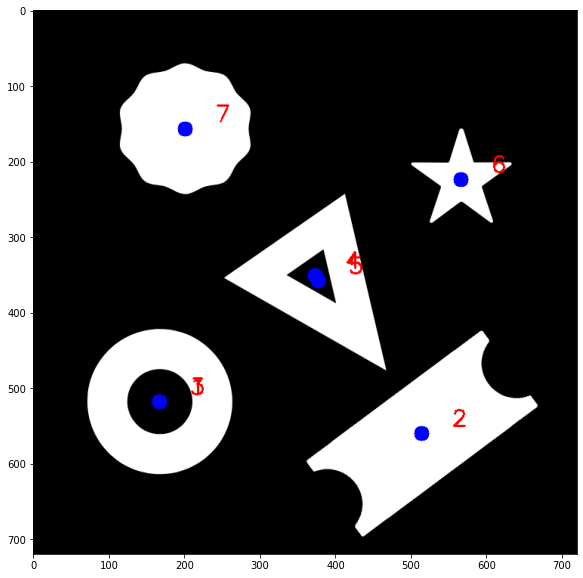

In [113]:
plt.imshow(img[:,:,::-1]);

Nota que as contornas 1, 3 e 4, 5 teñen centros moi próximos. Se observas as súas formas seguro que deduces o porque.

## <font style="color:rgb(50,120,229)">Área e Perímetro</font>

In [114]:
for index,cnt in enumerate(contours):
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt, True)
    print("Contorna #{} ten un área = {} e u perímetro = {}".format(index+1,area,perimeter))

Contorna #1 ten un área = 5797.0 e u perímetro = 285.0782080888748
Contorna #2 ten un área = 31898.0 e u perímetro = 938.8813602924347
Contorna #3 ten un área = 28977.5 e u perímetro = 635.369619846344
Contorna #4 ten un área = 2002.0 e u perímetro = 216.4507908821106
Contorna #5 ten un área = 21896.5 e u perímetro = 728.707710981369
Contorna #6 ten un área = 6214.5 e u perímetro = 525.1442201137543
Contorna #7 ten un área = 22854.0 e u perímetro = 579.3279893398285


## <font style="color:rgb(50,120,229)">Caixas limitantes</font>

Hai 2 tipos de caixas limitantes que podemos crear arredor dunha contorna:
1. Un rectángulo vertical
2. Un rectángulo xirado - Esta será a caixa coa mínima área que contén ao obxecto

In [115]:
img = image.copy()
for cnt in contours:
    # rectangulo vertical
    x,y,w,h = cv2.boundingRect(cnt)
    cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,255), 2)

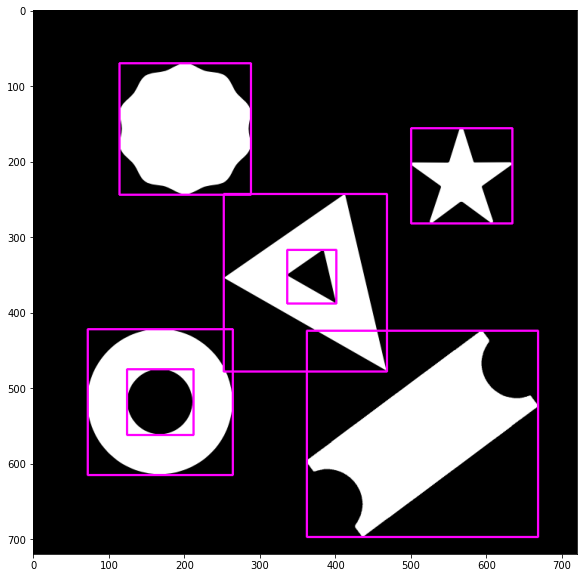

In [116]:
plt.imshow(img[:,:,::-1]);

In [117]:
img = image.copy()
for cnt in contours:
    # Caixa rotada
    box = cv2.minAreaRect(cnt)
    #numpy.int0 é un alias da clase numpy.int64
    boxPts = np.int0(cv2.boxPoints(box))
    # Emprega a función drawContours para debuxar 
    # as caixas rotadas
    cv2.drawContours(img, [boxPts], -1, (0,255,255), 2)

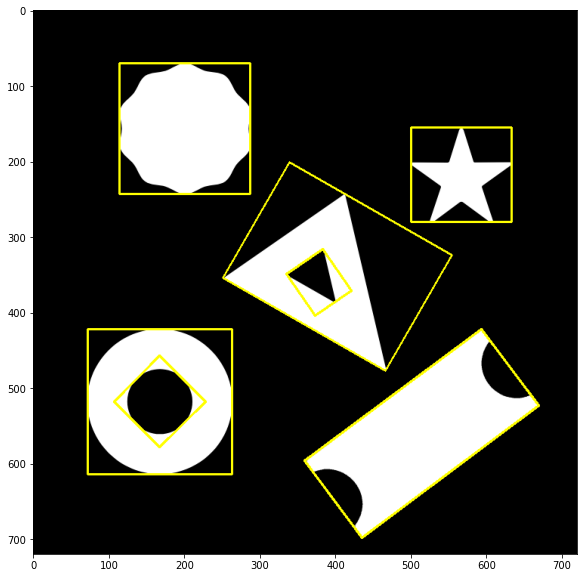

In [118]:
plt.imshow(img[:,:,::-1]);

## <font style="color:rgb(50,120,229)">Axusta a un círculo e/ou unha elipse</font>

Axustar unha contorna cunha caixa de delimitación (vertical ou xirada) é a opción preferida na maioría dos casos, pero nos casos nos que só se trata de círculos ou elipses, axustala a un círculo e/ou unha elipse é unha opción moito mellor.

Imos ver como facelo!

In [123]:
img = image.copy()
for cnt in contours:
    # axustamos a un circulo
    ((x,y),radius) = cv2.minEnclosingCircle(cnt)
    cv2.circle(img, (int(x),int(y)), int(round(radius)), (125,125,255), 2)

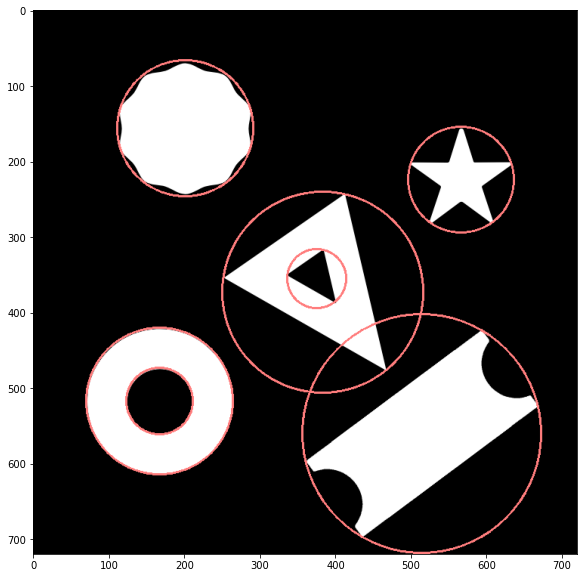

In [124]:
plt.imshow(img[:,:,::-1]);

In [121]:
img = image.copy()
for cnt in contours:
    # Axustamos a unha elipse: a contorna ten que ter mais de 5 puntos
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    cv2.ellipse(img, ellipse, (255,0,125), 2)

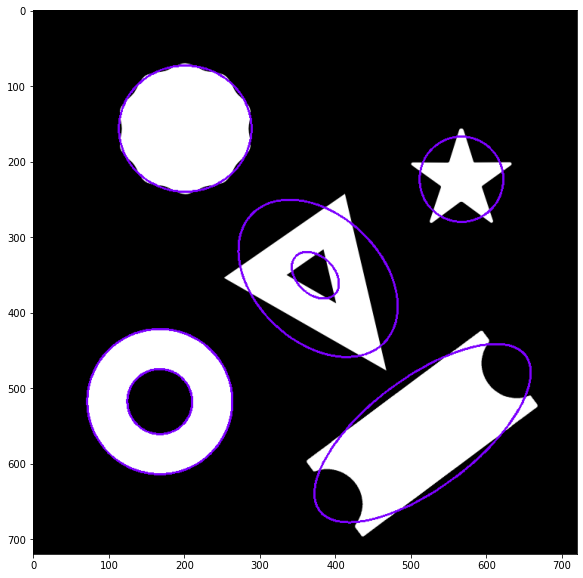

In [122]:
plt.imshow(img[:,:,::-1]);